# Import Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from dateutil import parser
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import plot_importance

In [2]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Import Dataset

In [38]:
add_df2 = pd.read_csv("mean_val.csv")
add_df2 =add_df2.dropna()
add_df2.shape

/home/leo/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (39,69,74,86,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,160,162,165,169,170) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(10356, 173)

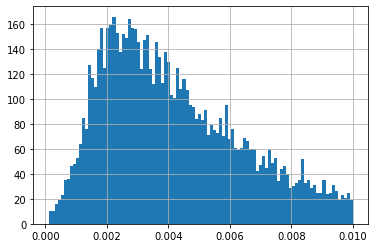

In [48]:
add_df2[(add_df2["CTR"]<0.01) & (add_df2["CTR"]>0.0001)]["CTR"].hist(bins=100)

0.6414960094288736


(array([ 263., 1084., 1561., 1341., 1042.,  815.,  613.,  455.,  333.,
         250.]),
 array([0.0018647 , 0.10165163, 0.20143856, 0.30122549, 0.40101242,
        0.50079935, 0.60058628, 0.70037321, 0.80016015, 0.89994708,
        0.99973401]),
 <a list of 10 Patch objects>)

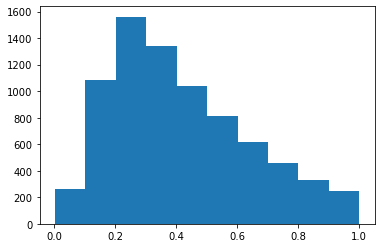

In [39]:
ctr = add_df2["CTR"].values
ctr = ctr[ctr>0.000]*100
print (np.mean(ctr))
plt.hist(ctr[ctr<1])

(array([466., 287., 211., 154.,  71.,  59.,  33.,  27.,  20.,  10.]),
 array([1.00008746, 1.29918464, 1.59828182, 1.89737899, 2.19647617,
        2.49557335, 2.79467053, 3.0937677 , 3.39286488, 3.69196206,
        3.99105924]),
 <a list of 10 Patch objects>)

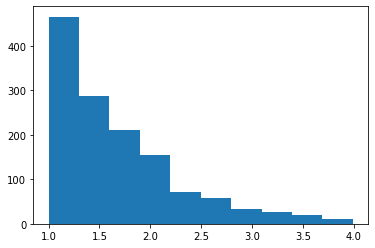

In [40]:
plt.hist(ctr[(ctr>1) & (ctr<4)])

(array([38., 11.,  5.,  4.,  2.,  0.,  1.,  2.,  0.,  3.]),
 array([ 4.00483782,  5.27102071,  6.53720359,  7.80338648,  9.06956936,
        10.33575225, 11.60193513, 12.86811801, 14.1343009 , 15.40048378,
        16.66666667]),
 <a list of 10 Patch objects>)

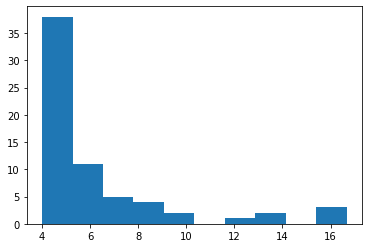

In [41]:
plt.hist(ctr[(ctr>4) & (ctr<20)])

(array([1.03014e+05, 1.26690e+04, 3.22100e+03, 1.12800e+03, 4.97000e+02,
        2.38000e+02, 1.22000e+02, 9.60000e+01, 6.00000e+01, 5.00000e+01,
        3.30000e+01, 2.50000e+01, 3.50000e+01, 6.00000e+00, 2.80000e+01,
        1.10000e+01, 2.20000e+01, 1.00000e+00, 4.00000e+00, 1.00000e+00,
        1.90000e+01, 1.00000e+00, 3.00000e+00, 0.00000e+00, 0.00000e+00,
        1.40000e+01, 0.00000e+00, 0.00000e+00, 5.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.60000e+01, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        2.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.30000e+01, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00

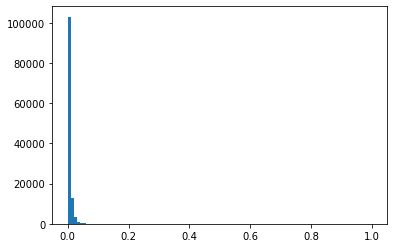

In [6]:
plt.hist(add_df2["CTR"],bins=100)

In [25]:
add_df2=add_df2.replace([0],['0'])
del add_df2['Carousel_Cards']
del add_df2['Third_Party_Brand']

In [26]:
df_shape2,column_names2 = add_df2.shape,add_df2.columns.to_list()
df_shape2

(121344, 173)

In [27]:
cols = ["Body_Text_Characters_Actual","Impressions","Outbound_Clicks","CTR"]
add_df2[cols] = add_df2[cols].replace(['0'],[0])
add_df2['Day']=add_df2['Day'].apply(lambda x: parser.parse(x).strftime("%A"))

# Input Features in Dictionary

In [10]:
column_names2

['Ad_ID',
 'Day',
 'Impressions',
 'Outbound_Clicks',
 'Call_To_Action',
 'Sale_Period',
 'Creator',
 'FB_Format',
 'Rational_or_Emotional_Appeal',
 'External_Validation',
 'Emotions',
 'Specific_Emotions',
 'Comparison',
 'Limited_Offer',
 'Price_Displayed',
 'Implied_Discount',
 'Discount_Displayed_As',
 'Guarantee_or_Warranty_Mentioned',
 'Subject',
 'Sex',
 'Number_of_Human_or_Animal_Subjects',
 'How_is_Subject_Engaging_With_Product',
 'Product_or_Services_Features_Displayed',
 'How_is_Product_Being_Displayed',
 'Packaging_Featured',
 'Seasonal',
 'Season_Highlighted',
 'Setting',
 'Location',
 'Time_of_Day',
 'Logo',
 'Logo_Color',
 'Text_Overlaid',
 'Dominant_Text_Color',
 'Dominant_Background_Color_For_Hook',
 'Dominant_Background_Color',
 'Emojis_or_Stickers',
 'Emojis_or_Stickers_Displayed',
 'Badges',
 'Badges_Visible',
 'Format',
 'Type',
 'Scenes_Changes',
 'Logo_Visible',
 'Duration',
 'Closed_caption',
 'Value_Proposition',
 'Psychology_Mentioned',
 'Sustainable_Results_M

In [11]:
add_df2['Subject'].unique()

array(['Food', 'None', 'Food, Product', 'Person', 'Person, Product',
       'Product', 'Food, Text', 'Text', 'Food, Person, Text',
       'Food, Person', 'Product, Text', 'Food, Person, Product',
       'Food, Product, Text', 'Food, Person, Product, Text',
       'Person, Text', 'Person, Product, Text', 'Content',
       'Content, Person', 'Product or Service',
       'Content, Person, Product or Service',
       'On Person, Product or Service', 'On Person',
       'Content, Product or Service', 'Animal, Content',
       'Person, Product or Service', 'On Person, Person', '0'],
      dtype=object)

In [12]:
input_features = {}
while True:
    feature = input('Enter new Feature: ')
    if feature=='exit':
        break
    value  = input('Enter its value: ')

    input_features[feature]=value


Enter new Feature: Subject
Enter its value: Food
Enter new Feature: exit


In [ ]:
for col in column_names2:
    if col !="CTR" and col != "Ad_ID" and col != "Impressions" and col !="Outbound_Clicks":
        add_df2[col]=label_encoder.fit_transform(add_df2[col])


In [ ]:
del add_df2["Impressions"]
del add_df2["Dominant_Background_Color"]
del add_df2["Day"]
del add_df2["Outbound_Clicks"]
X = add_df2[add_df2.columns[1:-1]]
y=  add_df2["CTR"]


[15:36:12] WARNING: ../src/learner.cc:576: 
Parameters: { "objectvie" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




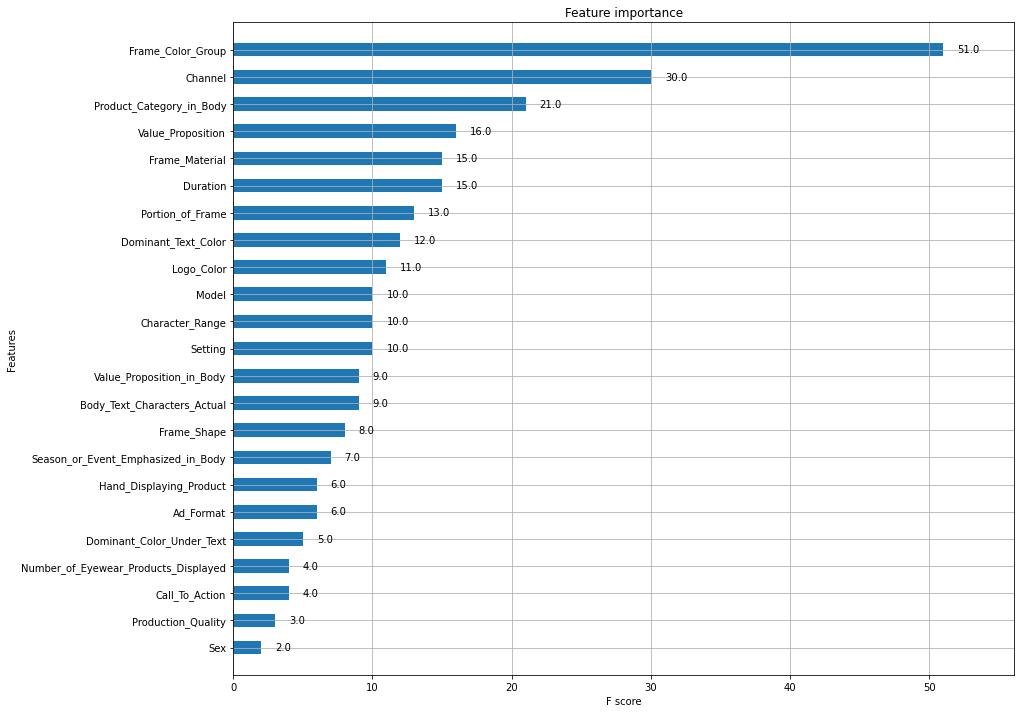

In [56]:
xgb_reg = xgb.XGBRegressor(max_depth=3, n_estimators=100, n_jobs=-1,
                           objectvie='reg:squarederror', booster='gbtree',
                           random_state=42, learning_rate=0.05)
xgb_reg.fit(X, y)

fig, ax = plt.subplots(1,1,figsize=(14, 12))
plot_importance(xgb_reg, max_num_features=50,ax=ax,height= 0.5) # top 30 most important features
plt.show()

# Analytical Approach #1

In [59]:
feature_important = xgb_reg.get_booster().get_score(importance_type='weight')
feature_important

{'Call_To_Action': 4.0,
 'Sex': 2.0,
 'Setting': 10.0,
 'Logo_Color': 11.0,
 'Dominant_Text_Color': 12.0,
 'Duration': 15.0,
 'Value_Proposition': 16.0,
 'Season_or_Event_Emphasized_in_Body': 7.0,
 'Body_Text_Characters_Actual': 9.0,
 'Character_Range': 10.0,
 'Dominant_Color_Under_Text': 5.0,
 'Ad_Format': 6.0,
 'Model': 10.0,
 'Value_Proposition_in_Body': 9.0,
 'Production_Quality': 3.0,
 'Frame_Color_Group': 51.0,
 'Frame_Material': 15.0,
 'Channel': 30.0,
 'Number_of_Eyewear_Products_Displayed': 4.0,
 'Portion_of_Frame': 13.0,
 'Hand_Displaying_Product': 6.0,
 'Frame_Shape': 8.0,
 'Product_Category_in_Body': 21.0}

In [61]:
import operator
sorted_d = dict( sorted(feature_important.items(), key=operator.itemgetter(1),reverse=True))
sorted_d

{'Frame_Color_Group': 51.0,
 'Channel': 30.0,
 'Product_Category_in_Body': 21.0,
 'Value_Proposition': 16.0,
 'Duration': 15.0,
 'Frame_Material': 15.0,
 'Portion_of_Frame': 13.0,
 'Dominant_Text_Color': 12.0,
 'Logo_Color': 11.0,
 'Setting': 10.0,
 'Character_Range': 10.0,
 'Model': 10.0,
 'Body_Text_Characters_Actual': 9.0,
 'Value_Proposition_in_Body': 9.0,
 'Frame_Shape': 8.0,
 'Season_or_Event_Emphasized_in_Body': 7.0,
 'Ad_Format': 6.0,
 'Hand_Displaying_Product': 6.0,
 'Dominant_Color_Under_Text': 5.0,
 'Call_To_Action': 4.0,
 'Number_of_Eyewear_Products_Displayed': 4.0,
 'Production_Quality': 3.0,
 'Sex': 2.0}

In [63]:
important_features = ['Dominant_Background_Color','Model','Color_Silhouette','Body_Text_Characters_Actual','Duration','FB_Format','Portion_of_Frame','Frame_Color_Group','Setting','How_is_Subject_Engaging_With_Product']
important_features_new = list(sorted_d.keys())

In [74]:
df_orignal = pd.read_csv("Final_combined_set_em_2.csv")
df_orignal =df_orignal.dropna()

/home/leo/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (5,6,8,17,24,27,35,38,40,42,43,46,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,68,69,70,73,75,80,81,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [88]:
def greedy_method_feature_prediction(input_frame,input_features,important_features,mode="CTR"):
    for key, value in input_features.items():
        input_frame = input_frame[input_frame[key] == value]
    if mode =="CTR":
        resultant_ctr = input_frame.sort_values(['CTR'], ascending=[False])
        resultant_features = resultant_ctr.iloc[0].to_dict()
    else:
        resultant_impressions = input_frame.sort_values(['Impressions'], ascending=[False])
        resultant_features = resultant_impressions.iloc[0].to_dict()
    important_features_dict={}
    counter=0
    for key, value in resultant_features.items():
        if key in important_features and value != '0' and value !=0 and counter<6:
            important_features_dict[key]=value
            counter=counter+1
    if mode=="CTR":
        return important_features_dict,resultant_features["CTR"]
    else:
        return important_features_dict,resultant_features["Impressions"]


In [89]:
greedy_method_feature_prediction(df_orignal,input_features,important_features_new,mode="Impressions")

({'Call_To_Action': 'LEARN_MORE',
  'Dominant_Text_Color': 'Black',
  'Value_Proposition': 'Psychology',
  'Body_Text_Characters_Actual': 176,
  'Character_Range': '150 to 199'},
 597840.0)